# Transformación y cálculo de indicadores SEPIID

 Análisis de datos exploratorio de los registros administrativos de: 
- Licencias de maternidad y paternidad
- Estímulos económicos por hijxs
- Acceso a Cendis y Estancias Infantiles

### Objectivos
- Transformar las variables claves

- Estadísticas descriptivas

- Aglomerar las columnas que se requieren para el cálculo de los siguientes indicadores:

1. Porcentaje de mujeres y de hombres que tienen acceso a prestaciones laborales e institucionales relacionadas con la conciliación corresponsable (acceso a trámites) 


https://docs.google.com/spreadsheets/d/17GZsKvYDVkK2Wo5ydhHyoCs4bDcrg-VInfmoyuxEaPI/edit?gid=404889619#gid=404889619

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/LicenciasMatPat2024_V2.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        992 non-null    int64  
 1   motivo_movimiento                 992 non-null    object 
 2   expediente                        990 non-null    float64
 3   ind_sexo                          992 non-null    object 
 4   cve_puesto                        992 non-null    object 
 5   nom_puesto                        992 non-null    object 
 6   tpo_puesto                        986 non-null    object 
 7   nivel                             992 non-null    object 
 8   rango                             921 non-null    object 
 9   cve_adscripcion                   992 non-null    object 
 10  fecha_ini                         990 non-null    object 
 11  fecha_fin                         990 non-null    object 
 12  dias_goz

In [7]:
df[df.duplicated(subset=['motivo_movimiento','expediente', 'fecha_ini','fech_prerregistro' ], keep=False)]

,Unnamed: 0,motivo_movimiento,expediente,ind_sexo,cve_puesto,nom_puesto,tpo_puesto,nivel,rango,cve_adscripcion,fecha_ini,fecha_fin,dias_gozados,circuito,ESTADO,CIUDAD,fech_prerregistro,edad,escolaridad,¿Tomó curso de crianza positiva?
482,482,NAN,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NaN,NaN,NaN,NaN,NAN,NAN,NAN,NaN,NAN,10
991,508,NAN,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NaN,NaN,NaN,NaN,NAN,NAN,NAN,NaN,NAN,22


In [9]:
df = df.drop_duplicates(subset=['motivo_movimiento','expediente', 'fecha_ini','fech_prerregistro'])

In [13]:
indicadores= ['motivo_movimiento' ,
'ind_sexo' ,
'nom_puesto' ,
'tpo_puesto' ,
'fecha_ini' ,
'fecha_fin' ,
'dias_gozados' ,
'circuito' ,
'ESTADO' ,
'CIUDAD' ,
'edad' ,
'escolaridad']

In [15]:
df_1 = df[indicadores]

In [17]:
print(df_1.isnull().sum())

motivo_movimiento    0
ind_sexo             0
nom_puesto           0
tpo_puesto           6
fecha_ini            1
fecha_fin            1
dias_gozados         1
circuito             1
ESTADO               0
CIUDAD               0
edad                 2
escolaridad          0
dtype: int64


In [19]:
for col in df_1.select_dtypes(include=['object', 'category', 'float64']).columns:
    print(f"--- {col} ---")
    print(df_1[col].value_counts(dropna=False))
    print("\n")
#se identifica dos valores faltantes en el tipo de movimiento

--- motivo_movimiento ---
motivo_movimiento
PATERNIDAD                        508
LICENCIA MEDICA POR MATERNIDAD    482
NAN                                 1
Name: count, dtype: int64


--- ind_sexo ---
ind_sexo
M      508
F      482
NAN      1
Name: count, dtype: int64


--- nom_puesto ---
nom_puesto
OFICIAL JUDICIAL C                                    488
ACTUARIA/ACTUARIO JUDICIAL                             71
SECRETARIA/SECRETARIO DE JUZGADO                       70
SECRETARIA/SECRETARIO DE TRIBUNAL                      59
OFICIAL JUDICIAL A                                     33
OFICIAL ADMINISTRATIVA/ADMINISTRATIVO                  32
CDORA. TECNICA ADMVA./CDOR. TECNICO ADMVO.             18
TECNICA/TECNICO DE SERVICIO B                          14
TECNICA/TECNICO DE SERVICIO A                          13
JUEZA/JUEZ DE DISTRITO                                 13
JEFA/JEFE DE DEPARTAMENTO                              13
ANALISTA ESPECIALIZADA/ESPECIALIZADO                   13
S

In [23]:
df_1['motivo_movimiento'] = df_1['motivo_movimiento'].replace('LICENCIA MEDICA POR MATERNIDAD', 'MATERNIDAD')
#Crear año y mes
df_1['fecha_ini'] = pd.to_datetime(df_1['fecha_ini'])
df_1['año'] = df_1['fecha_ini'].dt.year
df_1['mes'] = df_1['fecha_ini'].dt.month
df_1['licencia'] = 1

# Definir los intervalos y etiquetas para grupo de edad
bins = [20, 30, 40, 50, 100]
labels = ['21-30', '31-40', '41-50', '51+']
# Crear variable categórica
df_1['grup_edad'] = pd.cut(df_1['edad'], bins=bins, labels=labels)

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/992884851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['motivo_movimiento'] = df_1['motivo_movimiento'].replace('LICENCIA MEDICA POR MATERNIDAD', 'MATERNIDAD')
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/992884851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['fecha_ini'] = pd.to_datetime(df_1['fecha_ini'])
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/992884851.py:4: SettingWithCo

In [25]:
#borrar los nan, no se pueden distinguir
df_1 = df_1.dropna(subset=['motivo_movimiento', 'año'])


In [27]:
df_1['año'] = df_1['año'].astype(int)
df_1['mes'] = df_1['mes'].astype(int)

In [29]:
df_1.describe()

,fecha_ini,dias_gozados,circuito,edad,año,mes,licencia
count,990,990.000000,990.000000,989.000000,990.0,990.000000,990.0
mean,2024-06-15 00:56:43.636363520,87.857576,10.162626,34.755308,2024.0,6.042424,1.0
min,2024-01-01 00:00:00,7.000000,1.000000,0.000000,2024.0,1.000000,1.0
25%,2024-03-14 00:00:00,90.000000,2.000000,31.000000,2024.0,3.000000,1.0
50%,2024-06-10 00:00:00,90.000000,8.000000,34.000000,2024.0,6.000000,1.0
75%,2024-09-12 00:00:00,90.000000,17.000000,38.000000,2024.0,9.000000,1.0
max,2024-12-27 00:00:00,92.000000,32.000000,62.000000,2024.0,12.000000,1.0
std,NaN,10.540543,8.552746,5.567290,0.0,3.428634,0.0


In [31]:
df_1[df_1['dias_gozados'] == 92]
#Se observa valores arriba de lo que estipula la ley, sin embargo se debe a que ciertos meses tienen 31 días, y determina la administración 3 meses como 90 días

,motivo_movimiento,ind_sexo,nom_puesto,tpo_puesto,fecha_ini,fecha_fin,dias_gozados,circuito,ESTADO,CIUDAD,edad,escolaridad,año,mes,licencia,grup_edad
706,PATERNIDAD,M,AUXILIAR DE ACTUARIA/ACTUARIO,DE BASE,2024-05-07,2024-08-06,92.0,2.0,MEXICO,NAUCALPAN DE JUAREZ,36.0,SUPERIOR,2024,5,1,31-40
734,PATERNIDAD,M,OFICIAL JUDICIAL B,DE BASE,2024-05-31,2024-08-30,92.0,14.0,YUCATAN,MERIDA,37.0,SUPERIOR,2024,5,1,31-40


In [33]:
tabla = df_1.groupby(['año', 'mes', 'grup_edad' , 'motivo_movimiento']).size().reset_index(name='licencia')
tabla

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/3084865957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_1.groupby(['año', 'mes', 'grup_edad' , 'motivo_movimiento']).size().reset_index(name='licencia')


,año,mes,grup_edad,motivo_movimiento,licencia
0,2024,1,21-30,MATERNIDAD,7
1,2024,1,21-30,PATERNIDAD,16
2,2024,1,31-40,MATERNIDAD,41
3,2024,1,31-40,PATERNIDAD,44
4,2024,1,41-50,MATERNIDAD,7
...,...,...,...,...,...
91,2024,12,31-40,PATERNIDAD,9
92,2024,12,41-50,MATERNIDAD,3
93,2024,12,41-50,PATERNIDAD,1
94,2024,12,51+,MATERNIDAD,0


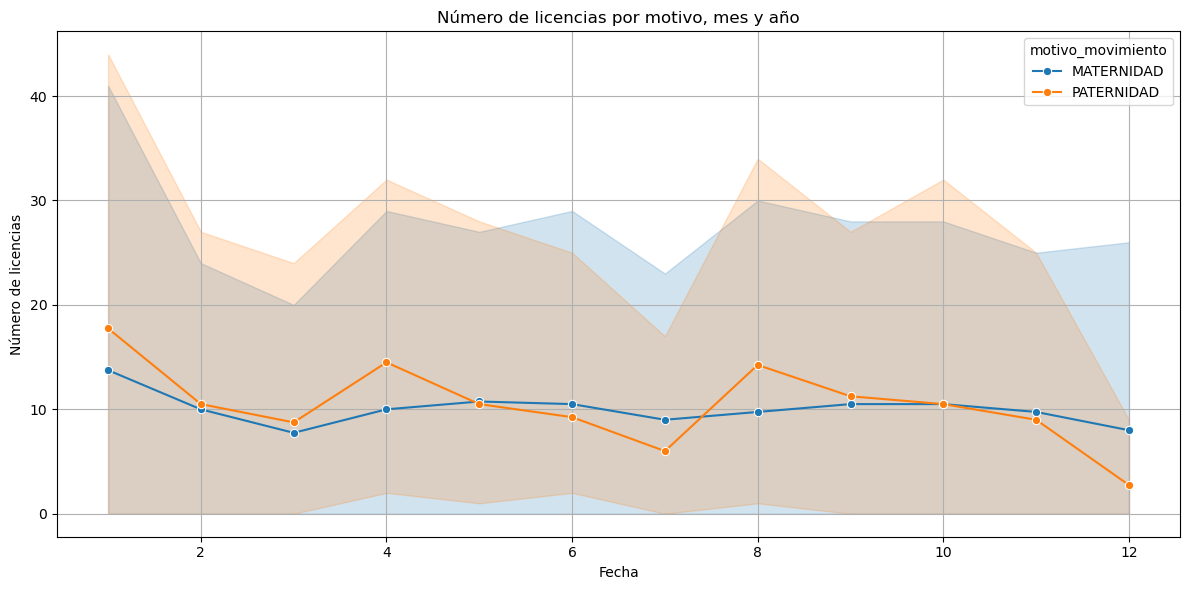

In [37]:
#Max y min del total
plt.figure(figsize=(12,6))
sns.lineplot(data=tabla, x='mes', y='licencia', hue='motivo_movimiento', marker='o', errorbar=('pi', 100))

plt.title('Número de licencias por motivo, mes y año')
plt.xlabel('Fecha')
plt.ylabel('Número de licencias')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
#con que frecuencia entre h y m gozaan los días de licencia
tab = df_1.groupby(['mes', 'grup_edad', 'motivo_movimiento'])['dias_gozados'].mean().reset_index()
tab.rename(columns={'dias_gozados': 'promedio_dias_gozados'}, inplace=True)
tab

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/2546362886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab = df_1.groupby(['mes', 'grup_edad', 'motivo_movimiento'])['dias_gozados'].mean().reset_index()


,mes,grup_edad,motivo_movimiento,promedio_dias_gozados
0,1,21-30,MATERNIDAD,90.000000
1,1,21-30,PATERNIDAD,86.812500
2,1,31-40,MATERNIDAD,90.000000
3,1,31-40,PATERNIDAD,88.090909
4,1,41-50,MATERNIDAD,90.000000
...,...,...,...,...
91,12,31-40,PATERNIDAD,90.000000
92,12,41-50,MATERNIDAD,90.000000
93,12,41-50,PATERNIDAD,90.000000
94,12,51+,MATERNIDAD,NaN


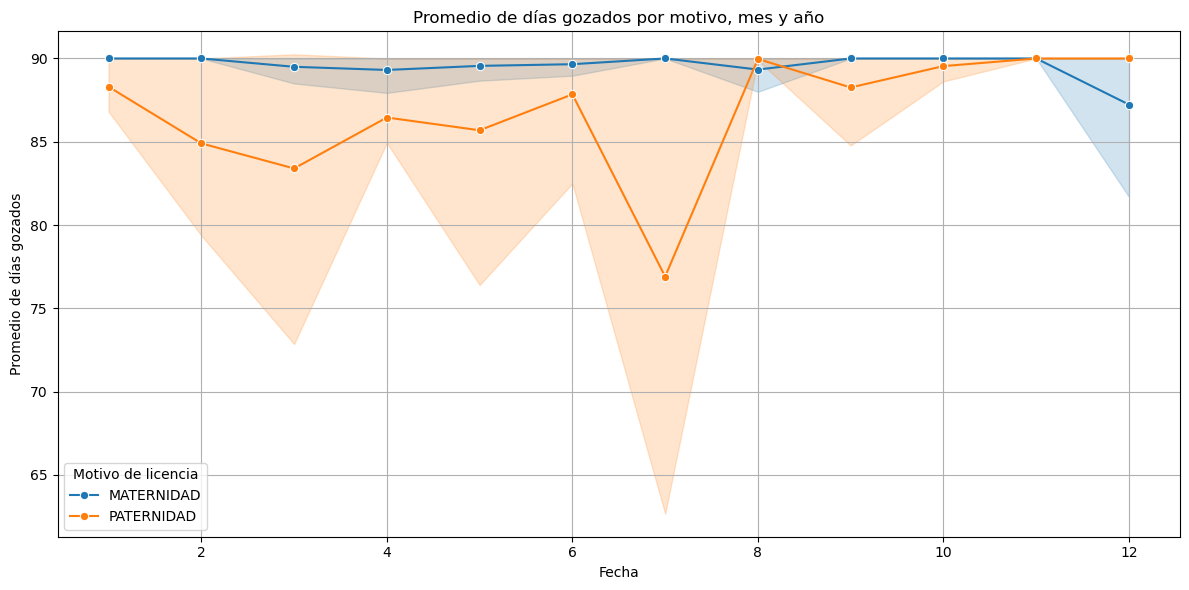

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(data=tab, x='mes', y='promedio_dias_gozados', hue='motivo_movimiento', marker='o', errorbar=('pi', 100))

plt.title('Promedio de días gozados por motivo, mes y año')
plt.xlabel('Fecha')
plt.ylabel('Promedio de días gozados')
plt.grid(True)
plt.legend(title='Motivo de licencia')
plt.tight_layout()
plt.show()

In [51]:
df_1.head()

,motivo_movimiento,ind_sexo,nom_puesto,tpo_puesto,fecha_ini,fecha_fin,dias_gozados,circuito,ESTADO,CIUDAD,edad,escolaridad,año,mes,licencia,grup_edad
0,MATERNIDAD,F,OFICIAL JUDICIAL C,DE BASE,2024-01-02,2024-03-31,90.0,1.0,CIUDAD DE MEXICO,MEXICO,31.0,SUPERIOR,2024,1,1,31-40
1,MATERNIDAD,F,OFICIAL ADMINISTRATIVA/ADMINISTRATIVO,DE BASE,2024-01-02,2024-03-31,90.0,14.0,YUCATAN,MERIDA,31.0,SUPERIOR,2024,1,1,31-40
2,MATERNIDAD,F,SECRETARIA/SECRETARIO DE TRIBUNAL,DE BASE,2024-01-02,2024-03-31,90.0,15.0,BAJA CALIFORNIA,MEXICALI,34.0,DOCTORADO,2024,1,1,31-40
3,MATERNIDAD,F,OFICIAL JUDICIAL C,DE BASE,2024-01-02,2024-03-31,90.0,3.0,JALISCO,ZAPOPAN,37.0,SUPERIOR,2024,1,1,31-40
4,MATERNIDAD,F,OFICIAL JUDICIAL C,DE BASE,2024-01-02,2024-03-31,90.0,2.0,MEXICO,NAUCALPAN DE JUAREZ,33.0,SUPERIOR,2024,1,1,31-40


In [55]:
df_1.to_csv("/Users/karlacruz/Desktop/MIDI/BD/licencias2024.csv", index=False)

# Estimulos económicos

In [57]:
esti = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/EstimulosGuarderia23_24.csv')

In [59]:
esti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3270 non-null   int64 
 1   numero              3270 non-null   int64 
 2   mes_inicio          3270 non-null   object
 3   genero              3270 non-null   object
 4   entidad_federativa  3270 non-null   object
 5   exp_madre           3270 non-null   int64 
 6   adscripcion         3270 non-null   object
 7   tipo_area           3270 non-null   object
 8   circuito            3270 non-null   int64 
 9   cargo               3270 non-null   object
 10  nivel_puesto        3270 non-null   object
 11  sexo_inf            3270 non-null   object
 12  edad_inf            3270 non-null   int64 
 13  anno                3270 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 357.8+ KB


In [61]:
for col in esti.select_dtypes(include=['object', 'category', 'int64']).columns:
    print(f"--- {col} ---")
    print(esti[col].value_counts(dropna=False))
    print("\n")

--- Unnamed: 0 ---
Unnamed: 0
0       1
2184    1
2174    1
2175    1
2176    1
       ..
1092    1
1093    1
1094    1
1095    1
3269    1
Name: count, Length: 3270, dtype: int64


--- numero ---
numero
1       2
1079    2
1089    2
1088    2
1087    2
       ..
1626    1
1625    1
1623    1
1622    1
1649    1
Name: count, Length: 1649, dtype: int64


--- mes_inicio ---
mes_inicio
INI 2024      1154
INI 2023      1052
OCTUBRE        245
MARZO          132
FEBRERO        131
SEPTIEMBRE     114
AGOSTO         113
ENERO          111
JUNIO           70
ABRIL           62
MAYO            60
JULIO           24
DICIEMBRE        2
Name: count, dtype: int64


--- genero ---
genero
F    1835
M    1435
Name: count, dtype: int64


--- entidad_federativa ---
entidad_federativa
CIUDAD DE MEXICO       329
JALISCO                239
COAHUILA               204
VERACRUZ               202
SINALOA                180
BAJA CALIFORNIA        130
PUEBLA                 128
ESTADO DE MEXICO       122
NAYARIT

In [65]:
esti[esti.duplicated(subset=['exp_madre'], keep=False)]
#hay casos que reciben más de un estímulo x hijxs
#exp_madre
#91447     6
#96549     6
#93661     5
#50530     5
#72962     4

,Unnamed: 0,numero,mes_inicio,genero,entidad_federativa,exp_madre,adscripcion,tipo_area,circuito,cargo,nivel_puesto,sexo_inf,edad_inf,anno,estimulo
0,0,1,OCTUBRE,M,CIUDAD DE MEXICO,203625,JUZGADO CUARTO DE DISTRITO EN MATERIA CIVIL EN...,ORGANO JURISDICCIONAL,1,SECRETARIA/SECRETARIO DE JUZGADO,13C,HOMBRE,2,2024,1
1,1,2,OCTUBRE,M,CIUDAD DE MEXICO,203625,JUZGADO CUARTO DE DISTRITO EN MATERIA CIVIL EN...,ORGANO JURISDICCIONAL,1,SECRETARIA/SECRETARIO DE JUZGADO,13C,HOMBRE,2,2024,1
5,5,6,SEPTIEMBRE,M,CIUDAD DE MEXICO,216496,DIRECCION GENERAL DE ARCHIVO Y DOCUMENTACION,AREA ADMINISTRATIVA,1,COORDINADOR TECNICO A,21,HOMBRE,3,2024,1
8,8,9,SEPTIEMBRE,F,CIUDAD DE MEXICO,225206,CENTRO DE JUSTICIA PENAL FEDERAL EN LA CIUDAD ...,ORGANO JURISDICCIONAL,1,ASIST. CONST. REG. JUEZ DE CONT. O ENJUICIAMIENTO,13C,HOMBRE,3,2024,1
9,9,10,SEPTIEMBRE,F,CIUDAD DE MEXICO,225206,CENTRO DE JUSTICIA PENAL FEDERAL EN LA CIUDAD ...,ORGANO JURISDICCIONAL,1,ASIST. CONST. REG. JUEZ DE CONT. O ENJUICIAMIENTO,13C,MUJER,1,2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,3264,1616,INI 2023,M,COLIMA,91014,CENTRO DE JUSTICIA PENAL FEDERAL EN EL ESTADO ...,ORGANO JURISDICCIONAL,32,OFICIAL ADMINISTRATIVA/ADMINISTRATIVO,27,HOMBRE,5,2023,1
3265,3265,1617,INI 2023,M,COLIMA,50530,CENTRO DE JUSTICIA PENAL FEDERAL EN EL ESTADO ...,ORGANO JURISDICCIONAL,32,JUEZA/JUEZ DE DISTRITO,7,HOMBRE,5,2023,1
3266,3266,1618,INI 2023,M,COLIMA,50530,CENTRO DE JUSTICIA PENAL FEDERAL EN EL ESTADO ...,ORGANO JURISDICCIONAL,32,JUEZA/JUEZ DE DISTRITO,7,HOMBRE,3,2023,1
3268,3268,1620,INI 2023,F,COLIMA,53475,TRIBUNAL COLEGIADO DEL TRIGESIMO SEGUNDO CIRCU...,ORGANO JURISDICCIONAL,32,"OFICIAL JUDICIAL ""C""",27,HOMBRE,6,2023,1


In [63]:
esti['estimulo'] = 1

In [67]:
esti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3270 non-null   int64 
 1   numero              3270 non-null   int64 
 2   mes_inicio          3270 non-null   object
 3   genero              3270 non-null   object
 4   entidad_federativa  3270 non-null   object
 5   exp_madre           3270 non-null   int64 
 6   adscripcion         3270 non-null   object
 7   tipo_area           3270 non-null   object
 8   circuito            3270 non-null   int64 
 9   cargo               3270 non-null   object
 10  nivel_puesto        3270 non-null   object
 11  sexo_inf            3270 non-null   object
 12  edad_inf            3270 non-null   int64 
 13  anno                3270 non-null   int64 
 14  estimulo            3270 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 383.3+ KB


In [71]:
esti = esti.drop(['Unnamed: 0', 'numero'], axis=1)

In [73]:
sp_esti = (
    esti.groupby(
        ['anno', 'mes_inicio', 'genero', 'entidad_federativa', 'adscripcion',
         'tipo_area', 'circuito', 'cargo', 'nivel_puesto', 'exp_madre']
    )
    .size()
    .reset_index(name='estimulo')
)

In [75]:
sp_esti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   anno                3027 non-null   int64 
 1   mes_inicio          3027 non-null   object
 2   genero              3027 non-null   object
 3   entidad_federativa  3027 non-null   object
 4   adscripcion         3027 non-null   object
 5   tipo_area           3027 non-null   object
 6   circuito            3027 non-null   int64 
 7   cargo               3027 non-null   object
 8   nivel_puesto        3027 non-null   object
 9   exp_madre           3027 non-null   int64 
 10  estimulo            3027 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 260.3+ KB


In [77]:
for col in sp_esti.select_dtypes(include=['object', 'category', 'int64']).columns:
    print(f"--- {col} ---")
    print(sp_esti[col].value_counts(dropna=False))
    print("\n")

--- anno ---
anno
2024    1531
2023    1496
Name: count, dtype: int64


--- mes_inicio ---
mes_inicio
INI 2024      1061
INI 2023       954
OCTUBRE        235
FEBRERO        128
MARZO          125
AGOSTO         107
SEPTIEMBRE     107
ENERO          102
JUNIO           66
ABRIL           60
MAYO            56
JULIO           24
DICIEMBRE        2
Name: count, dtype: int64


--- genero ---
genero
F    1688
M    1339
Name: count, dtype: int64


--- entidad_federativa ---
entidad_federativa
CIUDAD DE MEXICO       307
JALISCO                220
VERACRUZ               190
COAHUILA               180
SINALOA                175
PUEBLA                 124
BAJA CALIFORNIA        115
ESTADO DE MEXICO       109
GUANAJUATO             107
NAYARIT                107
NUEVO LEON             102
TAMAULIPAS              99
CHIHUAHUA               98
GUERRERO                98
SAN LUIS POTOSI         90
MICHOACAN               86
MORELOS                 85
SONORA                  84
CHIAPAS              

In [93]:
#remplazar valores que no responden a los meses del año
sp_esti['mes_inicio'] = sp_esti['mes_inicio'].replace({
    'INI 2024': ' ',
    'INI 2023': ' ',
})

In [115]:
esti = pd.crosstab(sp_esti['anno'], sp_esti['genero'])
esti

genero,F,M
anno,,
2023,848,648
2024,840,691


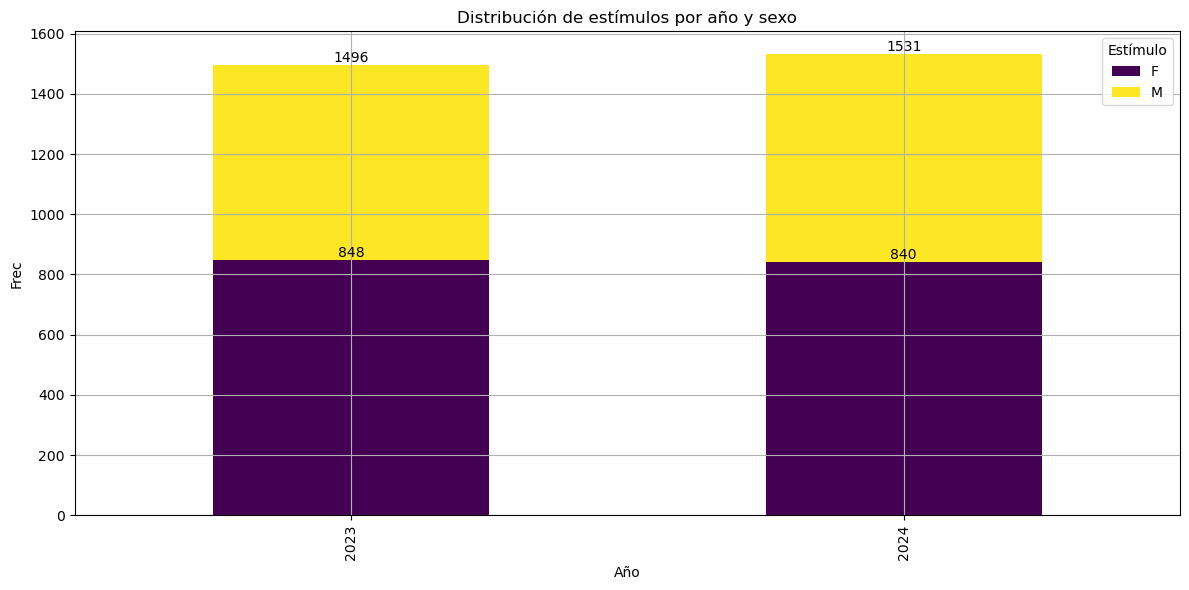

In [127]:
ax = esti.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Distribución de estímulos por año y sexo')
plt.xlabel('Año')
plt.ylabel('Frec')
plt.legend(title='Estímulo')
plt.grid(True)
plt.tight_layout()

# Añadir valores encima de las barras apiladas
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # 'center'

plt.show()


In [129]:
sp_esti.head()
#la variable estimulo es el número de estimulos x servidor publicos que recibe ayuda económica

,anno,mes_inicio,genero,entidad_federativa,adscripcion,tipo_area,circuito,cargo,nivel_puesto,exp_madre,estimulo
0,2023,ABRIL,F,CIUDAD DE MEXICO,DIRECCION GENERAL DE RECURSOS MATERIALES,AREA ADMINISTRATIVA,1,AUXILIAR DE SERVICIOS GENERALES,32,238085,1
1,2023,ABRIL,F,COAHUILA,JUZGADO PRIMERO DISTRITO DEL CENTRO AUXILIAR D...,ORGANO AUXILIAR,8,"OFICIAL JUDICIAL ""C""",27,206559,1
2,2023,ABRIL,F,COAHUILA,PRIMER TRIBUNAL COLEGIADO EN MATERIAS PENAL Y ...,ORGANO JURISDICCIONAL,8,"OFICIAL JUDICIAL ""C""",27,225600,1
3,2023,ABRIL,F,GUANAJUATO,PRIMER TRIBUNAL COLEGIADO EN MATERIA ADMINISTR...,ORGANO JURISDICCIONAL,16,CDORA. TECNICA ADMVA./CDOR. TECNICO ADMVO.,24A,205281,1
4,2023,ABRIL,F,JALISCO,SEGUNDO TRIBUNAL COLEGIADO EN MATERIA DE TRABA...,ORGANO JURISDICCIONAL,3,"OFICIAL JUDICIAL ""C""",27,50998,1


In [131]:
sp_esti.to_csv("/Users/karlacruz/Desktop/MIDI/BD/estimuloxpersonal.csv", index=False)

## Cendis

In [178]:
cendis = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/Cendis23_24.csv')

In [180]:
cendis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        888 non-null    int64 
 1   SEXO_INF          888 non-null    object
 2   EDAD_INF          888 non-null    object
 3   GRADO             888 non-null    object
 4   FECHA INGRESO     888 non-null    object
 5   CENDI             888 non-null    object
 6   SEXO_SP           888 non-null    object
 7   EDAD_SP           888 non-null    int64 
 8   ADSCRIPCION       888 non-null    object
 9   TIPO_AREA         888 non-null    object
 10  CIRCUITO          888 non-null    int64 
 11  PUESTO            888 non-null    object
 12  NIVEL DEL PUESTO  888 non-null    object
 13  AÑO               888 non-null    int64 
 14  ESTATUS_2023      888 non-null    object
dtypes: int64(4), object(11)
memory usage: 104.2+ KB


In [182]:
for col in cendis.select_dtypes(include=['object', 'category', 'int64']).columns:
    print(f"--- {col} ---")
    print(cendis[col].value_counts(dropna=False))
    print("\n")

--- Unnamed: 0 ---
Unnamed: 0
0      1
596    1
585    1
586    1
587    1
      ..
299    1
300    1
301    1
302    1
887    1
Name: count, Length: 888, dtype: int64


--- SEXO_INF ---
SEXO_INF
M    464
F    424
Name: count, dtype: int64


--- EDAD_INF ---
EDAD_INF
4                    207
3                    197
5                    185
2                    154
1                    119
MENOS DE 11 MESES     10
0                      7
12                     6
10                     1
8                      1
9                      1
Name: count, dtype: int64


--- GRADO ---
GRADO
PREESCOLAR 2    206
PREESCOLAR 3    196
PREESCOLAR 1    180
MATERNAL 2      142
MATERNAL 1       71
LACTANTES 3      58
LACTANTE 3       21
LACTANTE 2       10
LACTANTES 2       4
Name: count, dtype: int64


--- FECHA INGRESO ---
FECHA INGRESO
2023-08-01    154
2022-08-01    128
2022-08-02     74
2024-08-26     67
2019-09-17     33
             ... 
2018-05-14      1
2019-02-08      1
2018-10-18      1
201

In [184]:
#quito espacios de las categorias de CENDI
cendis['CENDI'] = cendis['CENDI'].str.strip().str.upper()

In [186]:
#homologo nombres de las categorias Gradi
cendis['GRADO'] = cendis['GRADO'].replace({
    'LACTANTE 2': 'LACTANTES 2',
    'LACTANTE 3': 'LACTANTES 3',
})

In [188]:
#convierto de obj a str y numerica
cendis['ESTATUS_2023'] = cendis['ESTATUS_2023'].astype(str)
cendis['FECHA INGRESO'] = cendis['FECHA INGRESO'].astype(str)
cendis['EDAD_SP'] = cendis['EDAD_SP'].astype(int)


In [190]:
#eliminar las fila de inactivos , no forman parte
cendis = cendis[cendis['ESTATUS_2023'] != 'INACTIVO']

In [192]:
#crear mes
#Crear año y mes
cendis['AÑO_INGRESO'] = cendis['FECHA INGRESO'].str[0:4]
cendis['MES_INGRESO'] = cendis['FECHA INGRESO'].str[5:7]
#crear el grupo de edad
# Definir los intervalos y etiquetas
bins = [20, 30, 40, 50, 100]
labels = ['20-30', '31-40', '41-50', '51+']
# Crear variable categórica
cendis['GRUP_EDAD'] = pd.cut(cendis['EDAD_SP'], bins=bins, labels=labels)


In [194]:
#contar a los servidores publicos
cendis['SP'] = 1 

In [196]:
#validar transformaciones
for col in cendis.select_dtypes(include=['object', 'category', 'int64']).columns:
    print(f"--- {col} ---")
    print(cendis[col].value_counts(dropna=False))
    print("\n")

--- Unnamed: 0 ---
Unnamed: 0
0      1
594    1
582    1
583    1
584    1
      ..
297    1
298    1
299    1
300    1
887    1
Name: count, Length: 882, dtype: int64


--- SEXO_INF ---
SEXO_INF
M    461
F    421
Name: count, dtype: int64


--- EDAD_INF ---
EDAD_INF
4                    207
3                    196
5                    180
2                    154
1                    119
MENOS DE 11 MESES     10
0                      7
12                     6
10                     1
8                      1
9                      1
Name: count, dtype: int64


--- GRADO ---
GRADO
PREESCOLAR 2    206
PREESCOLAR 3    191
PREESCOLAR 1    179
MATERNAL 2      142
LACTANTES 3      79
MATERNAL 1       71
LACTANTES 2      14
Name: count, dtype: int64


--- FECHA INGRESO ---
FECHA INGRESO
2023-08-01    154
2022-08-01    128
2022-08-02     73
2024-08-26     67
2019-09-17     31
             ... 
2018-12-12      1
2018-05-14      1
2019-02-08      1
2018-10-18      1
2019-11-29      1
Name: c

In [198]:
cendis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 887
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        882 non-null    int64   
 1   SEXO_INF          882 non-null    object  
 2   EDAD_INF          882 non-null    object  
 3   GRADO             882 non-null    object  
 4   FECHA INGRESO     882 non-null    object  
 5   CENDI             882 non-null    object  
 6   SEXO_SP           882 non-null    object  
 7   EDAD_SP           882 non-null    int64   
 8   ADSCRIPCION       882 non-null    object  
 9   TIPO_AREA         882 non-null    object  
 10  CIRCUITO          882 non-null    int64   
 11  PUESTO            882 non-null    object  
 12  NIVEL DEL PUESTO  882 non-null    object  
 13  AÑO               882 non-null    int64   
 14  ESTATUS_2023      882 non-null    object  
 15  AÑO_INGRESO       882 non-null    object  
 16  MES_INGRESO       882 non-null 

In [200]:
dupli = cendis[cendis.duplicated()]
dupli
#no hay registros duplicados

,Unnamed: 0,SEXO_INF,EDAD_INF,GRADO,FECHA INGRESO,CENDI,SEXO_SP,EDAD_SP,ADSCRIPCION,TIPO_AREA,CIRCUITO,PUESTO,NIVEL DEL PUESTO,AÑO,ESTATUS_2023,AÑO_INGRESO,MES_INGRESO,GRUP_EDAD,SP


In [202]:
ind= [
'AÑO',
'AÑO_INGRESO',
'MES_INGRESO',
'GRADO',
'CENDI',
'SEXO_INF',
'EDAD_INF',
'SEXO_SP',
'GRUP_EDAD',
'EDAD_SP',
'ADSCRIPCION',
'TIPO_AREA',
'CIRCUITO',
'PUESTO',
'NIVEL DEL PUESTO',
'SP'
]

In [262]:
df_cendi= cendis[ind]
df_cendi
#base reducida

,AÑO,AÑO_INGRESO,MES_INGRESO,GRADO,CENDI,SEXO_INF,EDAD_INF,SEXO_SP,GRUP_EDAD,EDAD_SP,ADSCRIPCION,TIPO_AREA,CIRCUITO,PUESTO,NIVEL DEL PUESTO,SP
0,2024,2024,10,PREESCOLAR 3,CIUDAD JUDICIAL EN PUEBLA,F,5,F,20-30,28,D.G.S.P. CENTRO DE DESARROLLO INFANTIL SAN AND...,AREA ADMINISTRATIVA,6,AUXILIAR EN EDUCACIO,28,1
1,2024,2024,08,MATERNAL 1,CIUDAD JUDICIAL EN PUEBLA,M,1,M,41-50,45,PRIMER TRIBUNAL LABORAL FEDERAL DE ASUNTOS IND...,ORGANO JURISDICCIONAL,6,JUEZA/JUEZ DE DISTRI,7,1
2,2024,2024,08,PREESCOLAR 3,CIUDAD JUDICIAL EN PUEBLA,F,5,F,31-40,36,JUZGADO 4TO DE DISTRITO EN MATERIA PENAL EN PU...,ORGANO JURISDICCIONAL,6,OFICIAL JUDICIAL C,27,1
3,2024,2024,08,MATERNAL 2,CIUDAD JUDICIAL EN PUEBLA,M,2,M,31-40,39,"JUZGADO 8VO DE DTO. EN MAT. AMPARO CIVIL, ADMV...",ORGANO JURISDICCIONAL,6,OFICIAL JUDICIAL C,27,1
4,2024,2024,09,PREESCOLAR 2,CIUDAD JUDICIAL EN PUEBLA,F,4,F,20-30,28,D.G.S.P. CENTRO DE DESARROLLO INFANTIL SAN AND...,AREA ADMINISTRATIVA,6,EDUCADORA/EDUCADOR,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2023,2023,08,PREESCOLAR 3,ROSIE STRAFFON DE TELLEZ,M,5,F,41-50,41,7MO TRIB COLEGIADO EN MATERIA ADMINISTRATIVA D...,NAN,3,OFICIAL JUDICIAL C,27,1
884,2023,2023,01,PREESCOLAR 3,ROSIE STRAFFON DE TELLEZ,M,5,F,41-50,44,JUZGADO 6TO DE DTO. EN MATERIA DE TRABAJO EN Z...,NAN,3,OFICIAL JUDICIAL C,27,1
885,2023,2022,08,PREESCOLAR 3,ROSIE STRAFFON DE TELLEZ,F,5,M,41-50,45,7MO TRIB COLEGIADO EN MATERIA ADMINISTRATIVA D...,NAN,3,OFICIAL JUDICIAL C,27,1
886,2023,2022,08,PREESCOLAR 3,ROSIE STRAFFON DE TELLEZ,F,5,F,41-50,46,1ER. TRIBUNAL COLEGIADO DE APELACION 3ER. CTO....,NAN,3,SECRETARIA/SECRETARI,13A,1


In [248]:
 #% de servidores públicos que hicieron uso de cendis por sexo y grupo de edad
total = df_cendi.groupby(['AÑO', 'SEXO_SP', 'GRUP_EDAD']).size().reset_index(name='SP')
total

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/1861294663.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_cendi.groupby(['AÑO', 'SEXO_SP', 'GRUP_EDAD']).size().reset_index(name='SP')


In [252]:
total['PORCENTAJE'] = total.groupby(['AÑO', 'GRUP_EDAD'])['SP'].transform(lambda x: (x / x.sum()) * 100)
total

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_10381/2218941261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total['PORCENTAJE'] = total.groupby(['AÑO', 'GRUP_EDAD'])['SP'].transform(lambda x: (x / x.sum()) * 100)


,AÑO,SEXO_SP,GRUP_EDAD,SP,PORCENTAJE
0,2023,F,20-30,14,70.000000
1,2023,F,31-40,167,75.909091
2,2023,F,41-50,112,70.886076
3,2023,F,51+,3,50.000000
4,2023,M,20-30,6,30.000000
5,2023,M,31-40,53,24.090909
6,2023,M,41-50,45,28.481013
7,2023,M,51+,3,50.000000
8,2023,SD,20-30,0,0.000000
9,2023,SD,31-40,0,0.000000


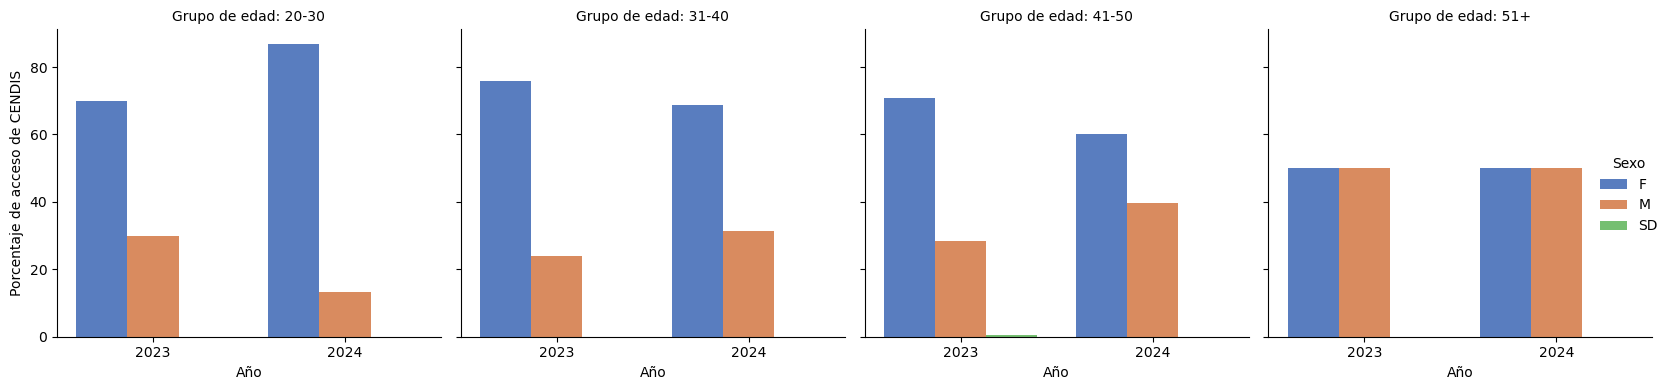

In [264]:
g = sns.catplot(
    data=total, kind='bar',
    x='AÑO', y='PORCENTAJE',
    hue='SEXO_SP', col='GRUP_EDAD',
    height=4, aspect=1,
    palette='muted'
)
g.set_axis_labels("Año", "Porcentaje de acceso de CENDIS")
g.set_titles("Grupo de edad: {col_name}")
g._legend.set_title('Sexo')
plt.tight_layout()
plt.show()

In [266]:
df_cendi.to_csv("/Users/karlacruz/Desktop/MIDI/BD/cendis.csv", index=False)

# Estancias Infantiles

In [25]:
## órganos jurisdiccionales
ei = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/EstanciasInfantiles23_24.csv')

In [27]:
ei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              120 non-null    int64  
 1   SEXO_INFANCIA           120 non-null    object 
 2   EDAD EN 2023_INFANCIA   60 non-null     float64
 3   GRADO_ESCOLAR_INFANCIA  120 non-null    int64  
 4   No. EXPEDIENTE          120 non-null    int64  
 5   CIUDAD DONDE LABORA_SP  120 non-null    object 
 6   SEXO_SP                 120 non-null    object 
 7   EDAD_SP                 120 non-null    int64  
 8   ADSCRIPCION_SP          120 non-null    object 
 9   TIPO DE ORGANO_SP       120 non-null    object 
 10  CIRCUITO_SP             120 non-null    int64  
 11  CARGO_SP                120 non-null    object 
 12  NIVEL DEL PUESTO_SP     120 non-null    object 
 13  EDAD EN 2024_INFANCIA   60 non-null     float64
dtypes: float64(2), int64(5), object(7)
memory 

In [29]:
d = ei[ei.duplicated()]
d

,Unnamed: 0,SEXO_INFANCIA,EDAD EN 2023_INFANCIA,GRADO_ESCOLAR_INFANCIA,No. EXPEDIENTE,CIUDAD DONDE LABORA_SP,SEXO_SP,EDAD_SP,ADSCRIPCION_SP,TIPO DE ORGANO_SP,CIRCUITO_SP,CARGO_SP,NIVEL DEL PUESTO_SP,EDAD EN 2024_INFANCIA


In [31]:
for col in ei.select_dtypes(include=['object', 'category', 'int64', 'float64']).columns:
    print(f"--- {col} ---")
    print(ei[col].value_counts(dropna=False))
    print("\n")

--- Unnamed: 0 ---
Unnamed: 0
0     2
1     2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    2
43    2
44    2
45    2
46    2
47    2
48    2
49    2
50    2
51    2
52    2
53    2
54    2
55    2
56    2
57    2
58    2
31    2
30    2
29    2
14    2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
15    2
28    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
59    2
Name: count, dtype: int64


--- SEXO_INFANCIA ---
SEXO_INFANCIA
F    80
M    40
Name: count, dtype: int64


--- EDAD EN 2023_INFANCIA ---
EDAD EN 2023_INFANCIA
NaN     60
6.0     14
8.0     12
7.0     11
10.0     9
11.0     8
9.0      6
Name: count, dtype: int64


--- GRADO_ESCOLAR_INFANCIA ---
GRADO_ESCOLAR_INFANCIA
1    31
2    28
3    25
4    14
5    14
6     8
Name: count, dtype: int64


--- No. EXPEDIENTE ---
No. EXPEDIENTE
44002    5
38843    5
75190    4
78772    3
54558    3
  

In [39]:
#se verificaron los expedientes con más de 1 hijxs
ei[ei['No. EXPEDIENTE'] == 44002]

,Unnamed: 0,SEXO_INFANCIA,EDAD EN 2023_INFANCIA,GRADO_ESCOLAR_INFANCIA,No. EXPEDIENTE,CIUDAD DONDE LABORA_SP,SEXO_SP,EDAD_SP,ADSCRIPCION_SP,TIPO DE ORGANO_SP,CIRCUITO_SP,CARGO_SP,NIVEL DEL PUESTO_SP,EDAD EN 2024_INFANCIA
22,22,F,7.0,2,44002,CDMX,FEMENINO,42,ADMINISTRACION EDIFICIO SAN LAZARO,ORGANO ADMINISTRATIVO,1,TECNICA ADMINISTRATIVA,30,NaN
23,23,F,7.0,2,44002,CDMX,FEMENINO,42,ADMINISTRACION EDIFICIO SAN LAZARO,ORGANO ADMINISTRATIVO,1,TECNICA ADMINISTRATIVO,30,NaN
51,51,F,10.0,5,44002,CDMX,FEMENINO,42,ADMINISTRACION EDIFICIO SAN LAZARO,ORGANO ADMINISTRATIVO,1,TECNICA ADMINISTRATI,30,NaN
105,45,F,NaN,3,44002,CDMX,F,42,ADMINISTRACION EDIFICIO SAN LAZARO,AREA ADMINISTRATIVA,1,TECNICA ADMINISTRATI,30,8.0
106,46,F,NaN,3,44002,CDMX,F,42,ADMINISTRACION EDIFICIO SAN LAZARO,AREA ADMINISTRATIVA,1,TECNICA ADMINISTRATI,30,8.0


In [41]:
print(ei.isnull().sum())

Unnamed: 0                 0
SEXO_INFANCIA              0
EDAD EN 2023_INFANCIA     60
GRADO_ESCOLAR_INFANCIA     0
No. EXPEDIENTE             0
CIUDAD DONDE LABORA_SP     0
SEXO_SP                    0
EDAD_SP                    0
ADSCRIPCION_SP             0
TIPO DE ORGANO_SP          0
CIRCUITO_SP                0
CARGO_SP                   0
NIVEL DEL PUESTO_SP        0
EDAD EN 2024_INFANCIA     60
dtype: int64


In [43]:
#crear variable de año
ei['AÑO'] = np.where(~ei['EDAD EN 2023_INFANCIA'].isna(), 2023,
              np.where(~ei['EDAD EN 2024_INFANCIA'].isna(), 2024, np.nan)) 

#homologo nombres de las categorias sexo
ei['SEXO_SP'] = ei['SEXO_SP'].replace({
    'F': 'FEMENINO',
    'M': 'MASCULINO',
})
## Crear variable categórica de edad
bins = [20, 30, 40, 50, 100]
labels = ['20-30', '31-40', '41-50', '51+']

ei['GRUP_EDAD'] = pd.cut(ei['EDAD_SP'], bins=bins, labels=labels)

In [47]:
#delimitar y ajustar formato
ei = ei.drop(['Unnamed: 0', 'SEXO_INFANCIA', 'EDAD EN 2023_INFANCIA', 'EDAD EN 2024_INFANCIA',], axis=1)
ei['AÑO'] = ei['AÑO'].astype(int)

In [49]:
for col in ei.select_dtypes(include=['object', 'category', 'int64', 'float64']).columns:
    print(f"--- {col} ---")
    print(ei[col].value_counts(dropna=False))
    print("\n")

--- GRADO_ESCOLAR_INFANCIA ---
GRADO_ESCOLAR_INFANCIA
1    31
2    28
3    25
4    14
5    14
6     8
Name: count, dtype: int64


--- No. EXPEDIENTE ---
No. EXPEDIENTE
44002    5
38843    5
75190    4
78772    3
54558    3
        ..
24828    1
70090    1
39823    1
93053    1
95429    1
Name: count, Length: 75, dtype: int64


--- CIUDAD DONDE LABORA_SP ---
CIUDAD DONDE LABORA_SP
CDMX       119
EDO MEX      1
Name: count, dtype: int64


--- SEXO_SP ---
SEXO_SP
FEMENINO     91
MASCULINO    29
Name: count, dtype: int64


--- EDAD_SP ---
EDAD_SP
44    14
39    10
41    10
40     9
45     9
42     8
37     8
48     7
43     6
34     4
47     4
52     4
35     4
46     3
30     3
33     3
36     3
32     2
31     2
38     2
53     2
49     1
51     1
55     1
Name: count, dtype: int64


--- ADSCRIPCION_SP ---
ADSCRIPCION_SP
ADMINISTRACION EDIFICIO SAN LAZARO                                                                     8
JUZGADO SEXTO DE DISTRITO EN MATERIA DE TRABAJO EN LA CIUDAD DE 

In [57]:
#% de mujeres y hombres que hacen uso de las estancias infantiles por sexo y grupo de edad
totales = ei.groupby(['AÑO', 'SEXO_SP', 'GRUP_EDAD']).size().reset_index(name='total')

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_5450/2578473861.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totales = ei.groupby(['AÑO', 'SEXO_SP', 'GRUP_EDAD']).size().reset_index(name='total')


In [61]:
totales['PORCENTAJE'] = totales.groupby(['AÑO', 'GRUP_EDAD'])['total'].transform(lambda x: (x / x.sum()) * 100)
totales

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_5450/3938077547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totales['PORCENTAJE'] = totales.groupby(['AÑO', 'GRUP_EDAD'])['total'].transform(lambda x: (x / x.sum()) * 100)


,AÑO,SEXO_SP,GRUP_EDAD,total,PORCENTAJE
0,2023,FEMENINO,20-30,1,100.000000
1,2023,FEMENINO,31-40,19,73.076923
2,2023,FEMENINO,41-50,26,92.857143
3,2023,FEMENINO,51+,3,60.000000
4,2023,MASCULINO,20-30,0,0.000000
5,2023,MASCULINO,31-40,7,26.923077
6,2023,MASCULINO,41-50,2,7.142857
7,2023,MASCULINO,51+,2,40.000000
8,2024,FEMENINO,20-30,1,50.000000
9,2024,FEMENINO,31-40,14,66.666667


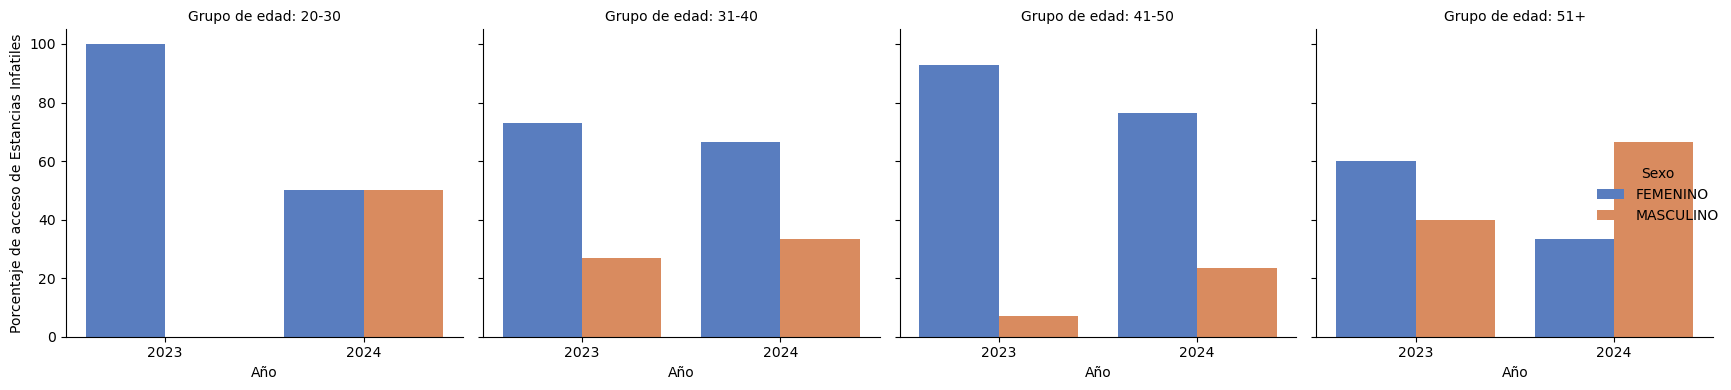

In [63]:
g = sns.catplot(
    data=totales, kind='bar',
    x='AÑO', y='PORCENTAJE',
    hue='SEXO_SP', col='GRUP_EDAD',
    height=4, aspect=1,
    palette='muted'
)
g.set_axis_labels("Año", "Porcentaje de acceso de Estancias Infatiles")
g.set_titles("Grupo de edad: {col_name}")
g._legend.set_title('Sexo')
plt.tight_layout()
plt.show()

In [65]:
ei.to_csv("/Users/karlacruz/Desktop/MIDI/BD/estancia23_24.csv", index=False)